<h2 align = "center"> Principle Component Analysis</h2>

### Some key terms

* Finds the direction of maximum variance of the data. If I project the data on that vector and then I compute the variance of the projected point./The dimensions should be orthogonal  
* Covariance matrix is the one associated with X (column based n*p) n is the number of the observations
* PCA projects p-dimensional data into a q-dimensional sub-space in a way that minimize the residual sum of squares of the projection (minimize the sum of squared distances from the points to their projections) = maximizing the covariance matrix
* Decompose the covariance matrix: we want the first principal component p1 to be a linear combination of the columns of X, p1 = aX, subject to ||a||=1 and we want p1 to have the highest possible variance.
* a will be given by the column eigenvector corresponding with the largest eigenvalue of covariance matrix
* Pick the first q principle component 

* Think of engivalue as measuring the effectiveness of reconstruct the original space. The larger the more effective. To transform the data into the new space and then do the filtering.

* Must be standardized before entering the model
* Singular Value Decomposition (SVD) is more numerically stable than eigendecomposition and is usually used in practice.
* How many principal components to retain will depend on the specific application.
* Plotting {(1-R^2)} versus the number of components can be useful to visualize the number of principal components that retain most of the variability contained in the original data.
* Two or three principal components can be used for visualization purposes.

_Not necessarily make the classification better. As there might be the situation where the individual feature has low variance but very correlated to the label got threw away in the pca_ 

* Principle component is the linear combination of original features

 Strenghts     | Weakness
 ------------- | -------------
 1) Good for visulization to see how the features might be correlated with the result <br/> 2) many statistical models suffer from high correlation between covariates, and PCA can be used to produce linear combinations of the covariates that are uncorrelated between each other <br/>  3) Reduce the computational time<br/> 4) Mitigate the overfitting as you fit to few parameters and only choose the ones which are | 1) Biased toward splits on features having a large number of levels <br />  2) Easy to overfit or underfit the model <br/> 3) have trouble modeling some relationships due to reliance on axis-parallel splits <br/> 4) small changes in the training data can result in large changes to decision logic 

### Another algorithm is called ICA (Independent component analysis)

Find the hidden variables that are uncorrelated to each other but has the highest correlation with the original variables. We can think of the observed variables are just the linear combination of the actual hidden variables (think of the microphone which record the voices from three people to some different degrees and we can recover each of them from all the microphones) 

Difference is ICA tries to find the  mutually independent components that has the highest correlation with the original feature space, PCA is tries to find the component that maximize the variance so that it can reconstruct the original space with little error.

In [1]:
brand.ratings = read.csv("http://goo.gl/IQl8nc")

In [2]:
head(brand.ratings)

,perform,leader,latest,fun,serious,bargain,value,trendy,rebuy,brand
1,2,4,8,8,2,9,7,4,6,a
2,1,1,4,7,1,1,1,2,2,a
3,2,3,5,9,2,9,5,1,6,a
4,1,6,10,8,3,4,5,2,1,a
5,1,1,5,8,1,9,9,1,1,a
6,2,8,9,5,3,8,7,1,2,a


In [3]:
summary(brand.ratings)

    perform           leader           latest            fun        
 Min.   : 1.000   Min.   : 1.000   Min.   : 1.000   Min.   : 1.000  
 1st Qu.: 1.000   1st Qu.: 2.000   1st Qu.: 4.000   1st Qu.: 4.000  
 Median : 4.000   Median : 4.000   Median : 7.000   Median : 6.000  
 Mean   : 4.488   Mean   : 4.417   Mean   : 6.195   Mean   : 6.068  
 3rd Qu.: 7.000   3rd Qu.: 6.000   3rd Qu.: 9.000   3rd Qu.: 8.000  
 Max.   :10.000   Max.   :10.000   Max.   :10.000   Max.   :10.000  
                                                                    
    serious          bargain           value            trendy     
 Min.   : 1.000   Min.   : 1.000   Min.   : 1.000   Min.   : 1.00  
 1st Qu.: 2.000   1st Qu.: 2.000   1st Qu.: 2.000   1st Qu.: 3.00  
 Median : 4.000   Median : 4.000   Median : 4.000   Median : 5.00  
 Mean   : 4.323   Mean   : 4.259   Mean   : 4.337   Mean   : 5.22  
 3rd Qu.: 6.000   3rd Qu.: 6.000   3rd Qu.: 6.000   3rd Qu.: 7.00  
 Max.   :10.000   Max.   :10.000   Max. 

In [4]:
brand.sc = brand.ratings

In [5]:
brand.sc[, 1:9] = scale(brand.ratings[, 1:9]) #it is always good practice to rescale the data

### Exploratary Analysis

In [6]:
library(corrplot)

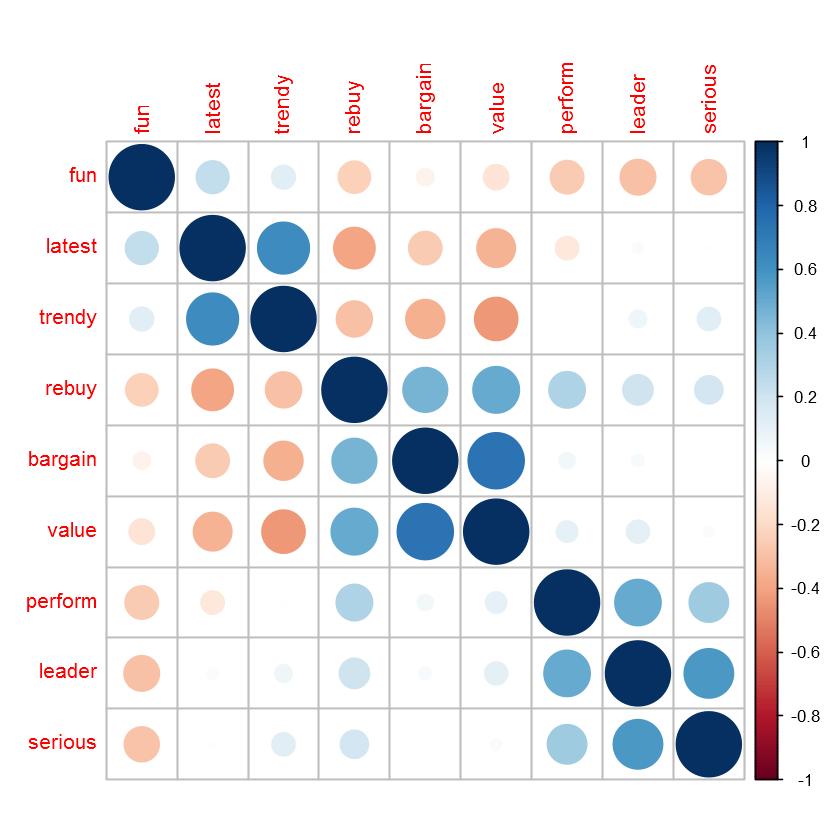

In [7]:
corrplot(cor(brand.sc[,1:9]), order = "hclust") ## The ranking is by the similarity in a hierarchical clustering solution

In [8]:
library(dplyr)


Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



In [9]:
head(brand.sc)

,perform,leader,latest,fun,serious,bargain,value,trendy,rebuy,brand
1,-0.776661668536801,-0.159866187493287,0.586408443255508,0.704017545132383,-0.836153221664238,1.77763492039193,1.11024040225575,-0.444914283108699,0.893267148091969,a
2,-1.08882471859179,-1.30998264427952,-0.713111652601573,0.339619229846471,-1.19609864640132,-1.22195996742403,-1.39124003842562,-1.17428196033607,-0.678694397164466,a
3,-0.776661668536801,-0.543238339755366,-0.388231628637303,1.0684158604183,-0.836153221664238,1.77763492039193,0.276413588695292,-1.53896579894976,0.893267148091969,a
4,-1.08882471859179,0.606878117030871,1.23616849118405,0.704017545132383,-0.476207796927158,-0.0971118844930419,0.276413588695292,-1.17428196033607,-1.07168478347857,a
5,-1.08882471859179,-1.30998264427952,-0.388231628637303,0.704017545132383,-1.19609864640132,1.77763492039193,1.94406721581621,-1.53896579894976,-1.07168478347857,a
6,-0.776661668536801,1.37362242155503,0.911288467219778,-0.389177400725355,-0.476207796927158,1.40268555941494,1.11024040225575,-1.53896579894976,-0.678694397164466,a


In [61]:
brand.mean = brand.sc %>% group_by(brand) %>% summarise_each(funs(mean))

In [15]:
brand.mean

,brand,perform,leader,latest,fun,serious,bargain,value,trendy,rebuy
1,a,-0.885918736056046,-0.527903453664883,0.410973230314802,0.656645764145215,-0.918940669353767,0.214096085117864,0.184692639203642,-0.52514472760371,-0.596166416038503
2,b,0.930870215263963,1.07075842126799,0.726106853560144,-0.972214705182815,1.18314061111078,0.0416193790684463,0.151339566661223,0.740308192385786,0.236973202947408
3,c,0.649923470214477,1.16276773781089,-0.102337207548745,-0.844675294832745,1.22273460783186,-0.607043015421755,-0.440677470966702,0.0255278687029582,-0.132437760187855
4,d,-0.679891123019756,-0.593076719549436,0.352494826001233,0.186571937426387,-0.692175051769406,-0.880756048934962,-0.932635290967373,0.736661353999649,-0.493988915596835
5,e,-0.564390794499412,0.192836192587826,0.456456433669799,0.295891432012161,0.0421136146942383,0.55155050999716,0.41816414700057,0.138579858673201,0.0365481059272122
6,f,-0.0586866534103372,0.269510623040242,-1.26215889310119,-0.217910192540976,0.589230660294601,0.874006960437376,1.0226885868319,-0.813244960108523,1.35699580394262
7,g,0.918383693261764,-0.167533630538528,-1.28490049477869,-0.516716811075424,-0.53379906488509,0.896503922095995,1.25616009462883,-1.27639343514791,1.36092570780576
8,h,-0.0149838264026394,-0.297880162307635,0.501939637024797,0.714949494590961,-0.141458551921673,-0.738275291763704,-0.78254646452649,0.86430069751444,-0.604026223764785
9,i,0.334638789658943,-0.32088249144336,0.355743626240876,0.412498892903653,-0.148657460416414,-0.25459061610338,-0.803392134865501,0.590787818554174,-0.203176029724394
10,j,-0.629945035010959,-0.788596517203096,-0.154318011383028,0.284959482553584,-0.602188695585136,-0.0971118844930419,-0.0737936730001005,-0.481382666970068,-0.961647475310624


In [11]:
library(gplots)


Attaching package: 'gplots'

The following object is masked from 'package:stats':

    lowess



In [12]:
library(RColorBrewer)

In [17]:
brand.mean.matrix = as.matrix(brand.mean[,-1])

In [19]:
dim(brand.mean.matrix)

[1] 10  9

In [31]:
(brand.mean$brand)

[1] a b c d e f g h i j
Levels: a b c d e f g h i j

In [32]:
rownames(brand.mean.matrix ) =brand.mean$brand

In [34]:
brand.mean.matrix

,perform,leader,latest,fun,serious,bargain,value,trendy,rebuy
a,-0.8859187,-0.5279035,0.4109732,0.6566458,-0.9189407,0.2140961,0.1846926,-0.5251447,-0.5961664
b,0.93087022,1.07075842,0.72610685,-0.97221471,1.18314061,0.04161938,0.15133957,0.74030819,0.23697320
c,0.64992347,1.16276774,-0.10233721,-0.84467529,1.22273461,-0.60704302,-0.44067747,0.02552787,-0.13243776
d,-0.6798911,-0.5930767,0.3524948,0.1865719,-0.6921751,-0.8807560,-0.9326353,0.7366614,-0.4939889
e,-0.56439079,0.19283619,0.45645643,0.29589143,0.04211361,0.55155051,0.41816415,0.13857986,0.03654811
f,-0.05868665,0.26951062,-1.26215889,-0.21791019,0.58923066,0.87400696,1.02268859,-0.81324496,1.35699580
g,0.9183837,-0.1675336,-1.2849005,-0.5167168,-0.5337991,0.8965039,1.2561601,-1.2763934,1.3609257
h,-0.01498383,-0.29788016,0.50193964,0.71494949,-0.14145855,-0.73827529,-0.78254646,0.86430070,-0.60402622
i,0.3346388,-0.3208825,0.3557436,0.4124989,-0.1486575,-0.2545906,-0.8033921,0.5907878,-0.2031760
j,-0.62994504,-0.78859652,-0.15431801,0.28495948,-0.60218870,-0.09711188,-0.07379367,-0.48138267,-0.96164748


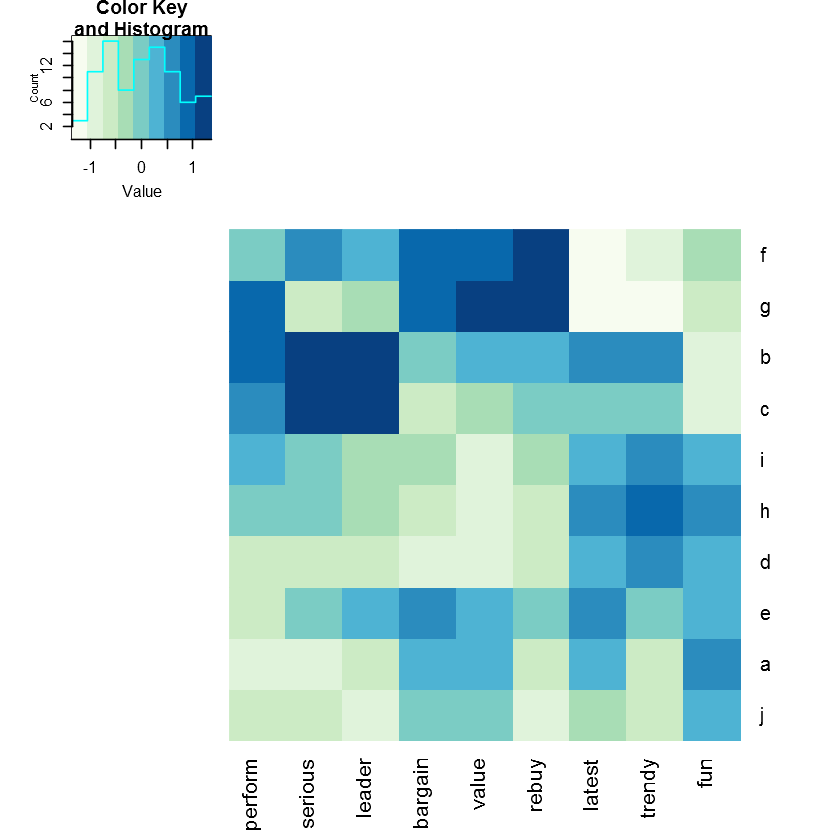

In [37]:
heatmap.2(brand.mean.matrix, col = brewer.pal(9, "GnBu"), trace = "none",  dend = "none")

* For example, bargain/value/rebuy seems to be very similar in terms of pattern which means a brand that is high on one tends to be high on another. 

### Conduct Principle Component Analysis

In [41]:
brand.pc = prcomp(brand.sc[,1:9])

In [43]:
summary(brand.pc)

Importance of components:
                         PC1    PC2    PC3    PC4     PC5     PC6     PC7
Standard deviation     1.726 1.4479 1.0389 0.8528 0.79846 0.73133 0.62458
Proportion of Variance 0.331 0.2329 0.1199 0.0808 0.07084 0.05943 0.04334
Cumulative Proportion  0.331 0.5640 0.6839 0.7647 0.83554 0.89497 0.93831
                           PC8     PC9
Standard deviation     0.55861 0.49310
Proportion of Variance 0.03467 0.02702
Cumulative Proportion  0.97298 1.00000

* Screeplot to see the successive variance accounted by each component. And the proportion largely levels out after the third component

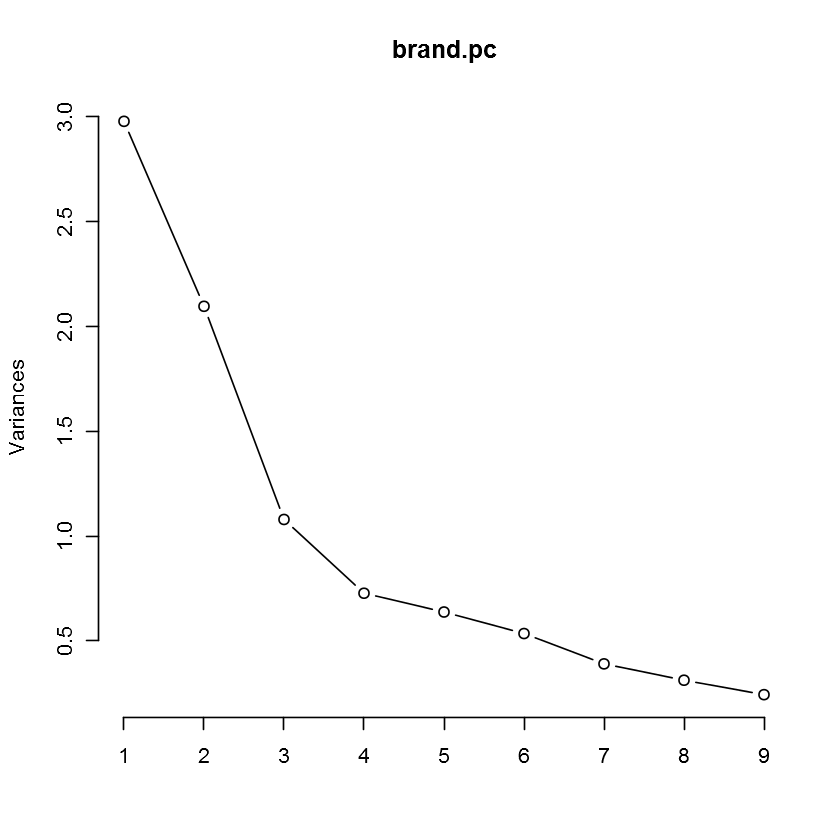

In [44]:
plot(brand.pc, type = "l")

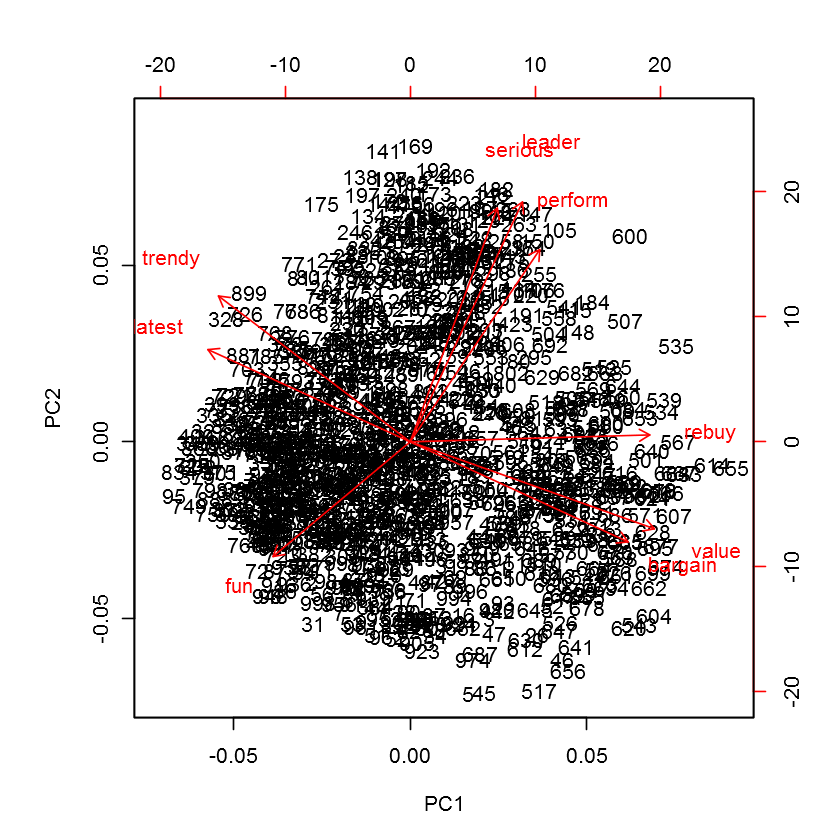

In [45]:
biplot(brand.pc) #hard to see the correlation between the raw data and the adjective 

### Instead of looking at the raw data, look at the perceptual maps

* You must choose the level and type of aggregation whether use mean or median or modal. You should check that the dimensions are similar for the full data and aggregated data

* analogous to correlation coefficients, squaring them give the amount of explained variation. Therefore the component loadings tell us how much of the variation in a variable is explained by the component. The higher the absolute value of the loading, the more important this variable is to the component 

In [62]:
brand.mean_0 = brand.mean[,-1]

In [63]:
rownames(brand.mean_0) = brand.mean$brand

* We aggregate by brand to have a clearer picture of how these componenet corresponding to each brand

In [64]:
brand.mu.pc = prcomp(brand.mean_0, scale = TRUE) #rescale the data (scale the mean data )

* Look at the loadings: to see how many loadings are in the same direction and what the size of them. Loadings measures the variables relationship to the principle component 

In [72]:
brand.mu.pc

Standard deviations:
[1] 2.13452052 1.73494730 0.76898915 0.61498280 0.50982614 0.36661576 0.21506243
[8] 0.14588236 0.04866747

Rotation:
               PC1         PC2         PC3         PC4         PC5         PC6
perform  0.2852486 -0.33729698 -0.48121446  0.46995620  0.39623804 -0.43471514
leader   0.2473668 -0.45654557  0.31711577 -0.19084693 -0.06130157 -0.11868317
latest  -0.3562989 -0.25056983  0.49589600  0.27477470  0.46061874  0.08173299
fun     -0.3355152  0.33455495  0.15167546  0.32394053 -0.38757837 -0.63609709
serious  0.2121240 -0.47463096  0.24371327 -0.21229430 -0.39428137 -0.33437227
bargain  0.3613409  0.27776101  0.45940272  0.29120398  0.11248446 -0.12716342
value    0.4010778  0.24062869  0.33576144  0.05052374  0.20581208  0.08329187
trendy  -0.3114405 -0.37521575  0.08724910  0.48392969 -0.27261916  0.33925412
rebuy    0.4295359  0.04438337 -0.09031492  0.44234693 -0.43824713  0.36828116
                PC7          PC8          PC9
perform  0.02784431 -0.07

* Look at the principle score to see how similar the observations (row) are to each other.

We can plotting these components to see which observations are heavily rely on pc1, pc2 etc. and thus give us a sense to do the clustering

In [73]:
brand.mu.pc$x #computed scores for each of the principal components that express the underlying data inters of its loadings on those componenets

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9
a,-1.26975937,1.96867662,0.77052660,-0.25789754,0.45833550,-0.12333696,-0.30020597,0.03940041,-0.07438024
b,1.21319932,-3.00321777,0.63833757,0.40419696,0.56545720,0.26203949,0.19758530,-0.05531044,-0.04695004
c,0.89895482,-2.72369309,-0.41489808,-1.07697324,-0.04659428,-0.25316622,-0.23491225,0.05162822,0.02650413
d,-2.53588027,0.07172185,-0.63553436,-0.13214479,-0.28244202,0.86233168,-0.06517629,0.02206181,0.00287119
e,-0.04805277,0.43104351,1.48245568,0.26740524,-0.12494148,0.06287852,-0.05324613,0.01729137,0.09693840
f,3.088619997,0.986670193,0.264979569,-0.185269569,-1.047539586,0.014878398,0.121000557,0.008913531,-0.046922928
g,3.53256645,1.65818898,-1.01215863,0.48051469,0.54911558,0.08633888,-0.12490715,-0.06061887,0.02996698
h,-2.317229288,-0.518722772,-0.357260974,0.524621694,-0.371884736,-0.396969358,-0.053748372,-0.295987128,-0.003418099
i,-1.349016122,-0.424285270,-0.532085706,0.819747734,-0.104333598,-0.347648456,0.083879405,0.302064163,-0.003311757
j,-1.21340277,1.55361775,-0.20436166,-0.84420119,0.40482743,-0.16734597,0.42973089,-0.02944305,0.01870236


In [74]:
cor(brand.mu.pc$x) #should be uncorrelated with each other. it is called princple component scores

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9
PC1,1.000000e+00,3.042445e-16,5.651880e-16,-4.721056e-16,-5.858767e-18,1.727553e-16,-9.005984e-16,-2.183432e-16,-2.155032e-15
PC2,3.042445e-16,1.000000e+00,7.122407e-16,1.046868e-16,-1.280909e-17,7.683740e-16,-6.745233e-16,2.752291e-17,4.011461e-15
PC3,5.651880e-16,7.122407e-16,1.000000e+00,7.962942e-17,3.048904e-16,-1.448265e-16,-1.274665e-15,-1.103963e-16,2.895099e-15
PC4,-4.721056e-16,1.046868e-16,7.962942e-17,1.000000e+00,-1.421335e-16,3.674253e-16,-9.796042e-17,-6.337691e-16,-6.540879e-16
PC5,-5.858767e-18,-1.280909e-17,3.048904e-16,-1.421335e-16,1.000000e+00,3.099846e-16,-4.859847e-16,2.154356e-16,5.986976e-15
PC6,1.727553e-16,7.683740e-16,-1.448265e-16,3.674253e-16,3.099846e-16,1.000000e+00,-1.330219e-16,-1.922335e-15,1.994546e-15
PC7,-9.005984e-16,-6.745233e-16,-1.274665e-15,-9.796042e-17,-4.859847e-16,-1.330219e-16,1.000000e+00,-4.400988e-17,-1.905685e-15
PC8,-2.183432e-16,2.752291e-17,-1.103963e-16,-6.337691e-16,2.154356e-16,-1.922335e-15,-4.400988e-17,1.000000e+00,2.156845e-16
PC9,-2.155032e-15,4.011461e-15,2.895099e-15,-6.540879e-16,5.986976e-15,1.994546e-15,-1.905685e-15,2.156845e-16,1.000000e+00


In [65]:
summary(brand.mu.pc)

Importance of components:
                          PC1    PC2    PC3     PC4     PC5     PC6     PC7
Standard deviation     2.1345 1.7349 0.7690 0.61498 0.50983 0.36662 0.21506
Proportion of Variance 0.5062 0.3345 0.0657 0.04202 0.02888 0.01493 0.00514
Cumulative Proportion  0.5062 0.8407 0.9064 0.94842 0.97730 0.99223 0.99737
                           PC8     PC9
Standard deviation     0.14588 0.04867
Proportion of Variance 0.00236 0.00026
Cumulative Proportion  0.99974 1.00000

<h3> <font color = "red"> MISUNDERSTANDING </font></h3>

* The positions of brands in such a map depend on their relative positioning in terms of the principal components, which are constructed composites of all dimensions.

* The strength of a brand on a single adjective can't be read directly from the graph
* Because we are looking at the largest-magnitude similarities, which may obscure smaller differences that don't show up strongly in the first one or two dimensions

* Compared to its position on other attributes, brand X is relatively differentiated by perceptions of strenght or weakness on such and such attribute 

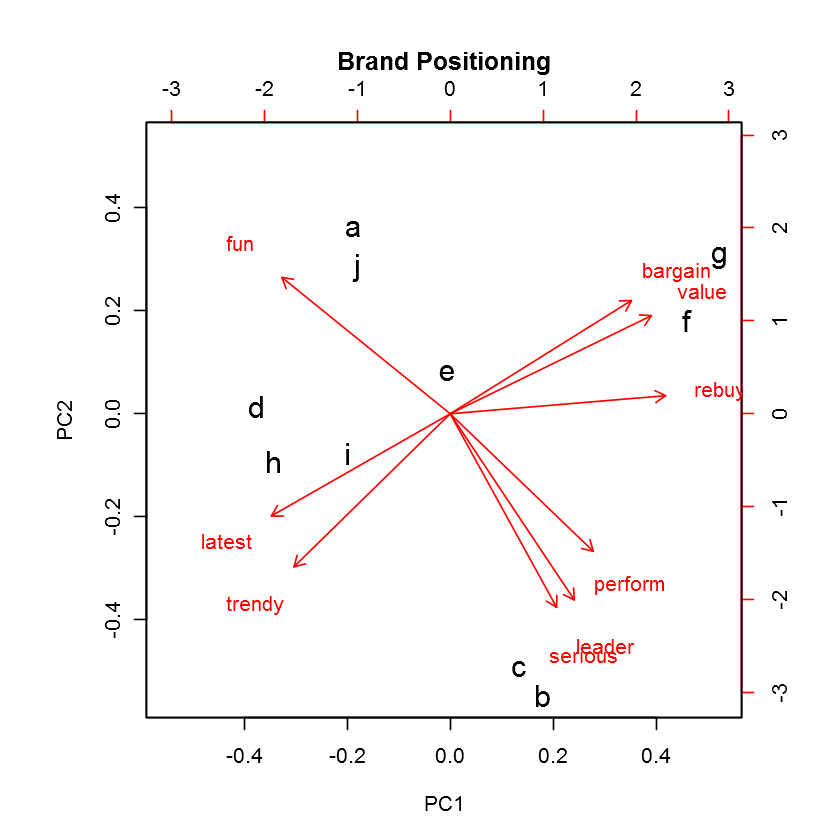

In [71]:
biplot(brand.mu.pc, main = "Brand Positioning", cex = c(1.5,1),choices = c(1,2)) #choice to specify which component you are looking at

### How to interpret biplot

* It shows the data points in terms of how they position based on the two component of each data point 
* **Direction** and **Angle** matters
1) **Direction**: indicate positive or negative relationship of the variables
2) **Angle**: a closer angle indicates higher positive association 
* The principle components are uncorrelated
* The left and bottom axes are showing [normalized] principal component scores; the top and right axes are showing the loadings.



* First check whether the biplot has varied a lot compared to the previous one
* T